something is wrong with the diffuser code

In [1]:
import optics_cuda
import cupy as cp
import matplotlib.pyplot as plt
import scattering
import numpy as np

source = optics_cuda.FatPencil(1,1,500,1,1)
size = 1000000
photons = source.make_photons(size)
print(photons.ez_x)
print(photons.ez_y)
print(photons.ez_z)

/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[1. 1. 1. ... 1. 1. 1.]


In [2]:
diffuser = optics_cuda.AcryliteDiffuser()
phi = scattering.get_scattering_phi(size)
theta = diffuser._scattering.get_scattering_theta(size)
print(phi)
print(theta)

[0.3773767 3.0118473 6.254207  ... 4.8346815 4.831145  2.2475364]
[0.00694768 0.42124665 0.10054946 ... 0.6517592  0.66264504 0.77329826]


In [3]:
scattering.scatter((2,),(1024,),(photons.ez_x,photons.ez_y,photons.ez_z,theta,phi,int(size)))
print(photons.ez_x)
print(photons.ez_y)
print(photons.ez_z)

[-0.00645875  0.40546158 -0.10033797 ... -0.07399617 -0.0728875
  0.43743864]
[-0.00256008 -0.05290397  0.00290843 ...  0.6020557   0.61087126
 -0.54456294]
[0.99997586 0.9125799  0.99494916 ... 0.79501796 0.78836775 0.71561074]


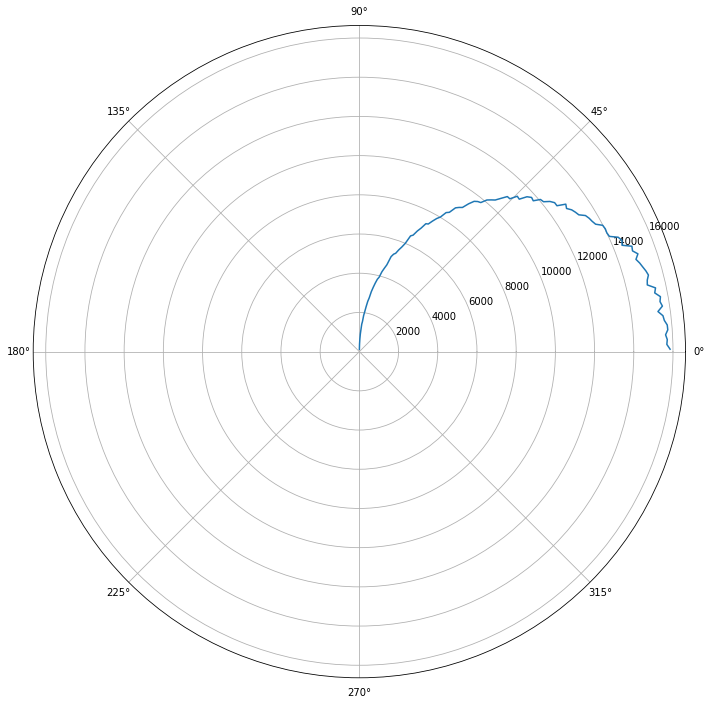

In [4]:
h,b = cp.histogram(cp.arccos(photons.ez_z), 100)
fig = plt.figure(figsize=[15, 12])
ax = plt.subplot(projection='polar')
plt.plot(((b[:-1]+b[1:])/2).get(),h.get())

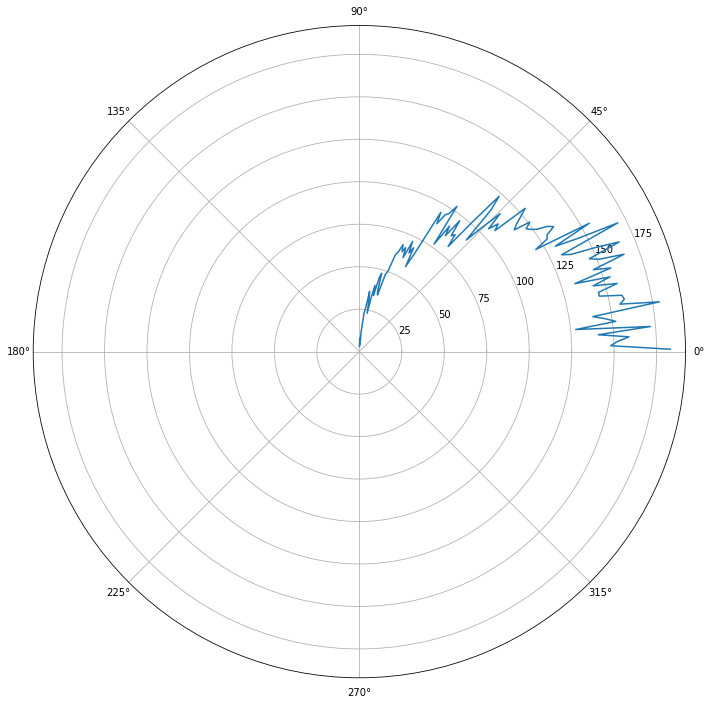

In [5]:
x = diffuser._scattering.get_scattering_theta(10000)
h,b=cp.histogram(x,100)
fig = plt.figure(figsize=[15, 12])
ax = plt.subplot(projection='polar')
plt.plot(((b[:-1]+b[1:])/2).get(),h.get())

In [6]:
diffuser.diffuse(photons)
print(photons.ez_x)
print(photons.ez_y)
print(photons.ez_z)

[-0.3297522   0.7942752   0.01982796 ...  0.43413034 -0.0133134
  0.98251694]
[ 0.2713993   0.60335773 -0.5791857  ...  0.89919424 -0.53212297
 -0.04831365]
[ 0.90421563 -0.07131828  0.8149545  ...  0.0545965   0.84656245
 -0.17979543]


In [7]:
photons = source.make_photons(1)
print(photons.ez_x)
print(photons.ez_y)
print(photons.ez_z)
theta = cp.full(1, np.pi/4, dtype=np.float32)
phi = cp.full(1, np.pi/2, dtype=np.float32)
size = np.int32(1)
scattering.scatter((1,),(1,),(photons.ez_x,photons.ez_y,photons.ez_z,theta,phi,size))
print(photons.ez_x)
print(photons.ez_y)
print(photons.ez_z)

[0.]
[0.]
[1.]
[3.090862e-08]
[-0.7071068]
[0.70710677]
